In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, Binarizer

#file locations
current_dir = os.path.realpath(".")
data_folder = os.path.join(current_dir,'data')
datafile = os.path.join(data_folder,'CapstoneData.csv')
dataheaderfile = os.path.join(data_folder,'CapstoneDataHeaders.csv')

#Read in data files.
df_headers = list(pd.read_csv(dataheaderfile))
df = pd.read_csv(datafile,names = df_headers)

#Trim data table
useful_columns = ['BusinessUnit','eventOccurredDate','companyInvolved','operationOrDevelopment'
                      ,'jobTypeObserved','event','eventClassification','eventType','stopJob'
                      ,'immediateActionsTaken','actionCompletedOnsiteDetail','furtherActionNecessaryComments','rigInvolved']
df_trimmed = df.copy()
df_trimmed = df_trimmed[useful_columns]

#Clean data table
df_trimmed[['rigInvolved']] = df_trimmed[['rigInvolved']].fillna(value='No')
df_trimmed[['stopJob']] = df_trimmed[['stopJob']].fillna(value='No')
df_trimmed.loc[(df_trimmed['immediateActionsTaken'] == 'Action Completed Onsite'),'furtherActionNecessaryComments'] = np.nan
df_trimmed.loc[(df_trimmed['immediateActionsTaken'] == 'Further Action Necessary'),'actionCompletedOnsiteDetail'] = np.nan
df_trimmed['comments'] = df_trimmed.actionCompletedOnsiteDetail.combine_first(df_trimmed.furtherActionNecessaryComments)
df_trimmed[['comments']] = df_trimmed[['comments']].fillna(value='None')
df_trimmed = df_trimmed.drop(['actionCompletedOnsiteDetail', 'furtherActionNecessaryComments'], axis=1)
df_trimmed = df_trimmed[df_trimmed.companyInvolved.isnull() == False]
df_trimmed = df_trimmed[df_trimmed.jobTypeObserved.isnull() == False]
df_trimmed = df_trimmed[df_trimmed.immediateActionsTaken.isnull() == False]
df_trimmed = df_trimmed[df_trimmed.BusinessUnit.isnull() == False]
df_trimmed.loc[(df_trimmed['companyInvolved'] != 'BP'),'companyInvolved'] = 'Other'

/home/evan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#df_trimmed.info()
#df_trimmed.head()
df_trimmed.event.unique()
# df_trimmed.eventClassification.unique()

array(['Observation', 'Incident'], dtype=object)

In [3]:
##categories can be considered counts over time. Which could then become ratios.
categories = ['event','eventClassification']#,'companyInvolved','operationOrDevelopment','jobTypeObserved','stopJob','immediateActionsTaken','rigInvolved']
BUMatrix = pd.get_dummies(df_trimmed,columns = categories)

In [4]:
# fig = plt.figure() 
# ax = fig.add_subplot(1,1,1) 
# ax.set_ylabel('Counts') 
# ax.plot(BUMatrix['event_Observations']) 
# plt.show()

In [5]:
#BUMatrix.head()
useful_columns = ['BusinessUnit','eventOccurredDate','event_Observation','event_Incident']
BUMatrix = BUMatrix[useful_columns]

In [6]:
BUMatrix['eventOccurredDate'] = pd.to_datetime(df['eventOccurredDate']).dt.date

In [7]:
BUMatrix = BUMatrix.groupby([BUMatrix.eventOccurredDate,BUMatrix.BusinessUnit]).sum()

In [8]:
BUMatrix = BUMatrix.reset_index()

In [9]:
BUMatrix.sort_values(by = ['eventOccurredDate'])

,eventOccurredDate,BusinessUnit,event_Observation,event_Incident
0,2017-01-01,East,1,0
1,2017-06-01,Central Support,0,1
2,2017-06-03,Midcon,0,1
3,2017-06-05,West,0,2
4,2017-06-07,Midcon,0,1
5,2017-06-08,West,0,1
6,2017-06-12,Midcon,4,0
7,2017-06-12,West,0,1
8,2017-06-13,Midcon,6,0
9,2017-06-13,North,1,0


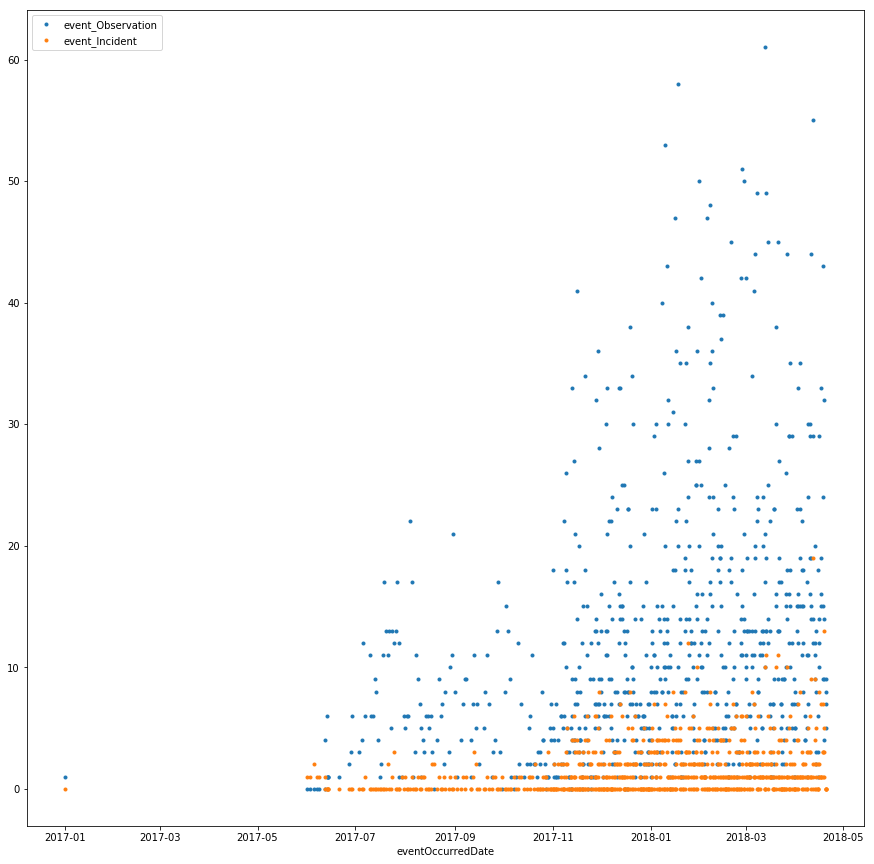

In [10]:
#BUMatrix.plot(kind='scatter',x='', y='event_Observation')
BUMatrix.plot(x='eventOccurredDate', y=['event_Observation','event_Incident'],style=".",figsize=(15,15))
plt.show()
# from pandas.plotting import scatter_matrix
# scatter_matrix(BUMatrix)